In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [57]:
# Load the CSV file
time_interval = 2 #minutes
csv_file_path = '/Users/fnarslan/Documents/in_vivo/3D_mastodon_celltracking/240823_pos5_pnbb_MastodonTable-Spot.csv' 
df = pd.read_csv(csv_file_path, skiprows=[2, 3, 4])
# Display the first few rows of the dataframe to understand its structure
print(df.head())

   Label   ID  Spot N links    Spot N links.1    Spot N links.2  \
0    NaN  NaN  Spot N links  N incoming links  N outgoing links   
1    2.0  2.0             2                 1                 1   
2    3.0  3.0             2                 1                 1   
3    4.0  4.0             2                 1                 1   
4    5.0  5.0             2                 1                 1   

  Spot center intensity Spot center intensity.1 Spot center intensity.2  \
0            Center ch1              Center ch2              Center ch3   
1     5918.942868609872      3697.4697051933445        523.884850853634   
2     5690.165690658563      3343.9190240539438       501.5556447418746   
3     5684.054335572809      3339.9074294001293       470.0321142527184   
4     5730.342540216507       3214.907033013876       452.2469376526699   

  Spot frame      Spot intensity  ... Spot intensity.17       Spot position  \
0                       Mean ch1  ...           Sum ch3            

#### Import Mastodon

In [8]:
# for single channel
track_column = 'Spot track ID'  # Column name for Track ID
time_column = 'Spot frame'          # Column name for Time
intensity_column = 'Spot intensity'  # Column name for Mean Ch1 Intensity

In [20]:
#for multiple channels
track_column = 'Spot track ID'  # Column name for Track ID
time_column = 'Spot frame'          # Column name for Time
intensity_column = 'Spot intensity'  # Column name for Mean Ch1 Intensity

In [82]:
#for multiple channels
track_column = 'Spot track ID'  # Column name for Track ID
time_column = 'Spot frame'          # Column name for Time
intensity_column = 'Spot intensity.6'  # Column name for Mean Ch2 Intensity

In [83]:
position_y_column = 'Spot position.1' 

In [58]:
#for multiple channels
track_column = 'Spot track ID'  # Column name for Track ID
time_column = 'Spot frame'          # Column name for Time
intensity_column = 'Spot intensity.12'  # Column name for Mean Ch3 Intensity

#### Plot Results

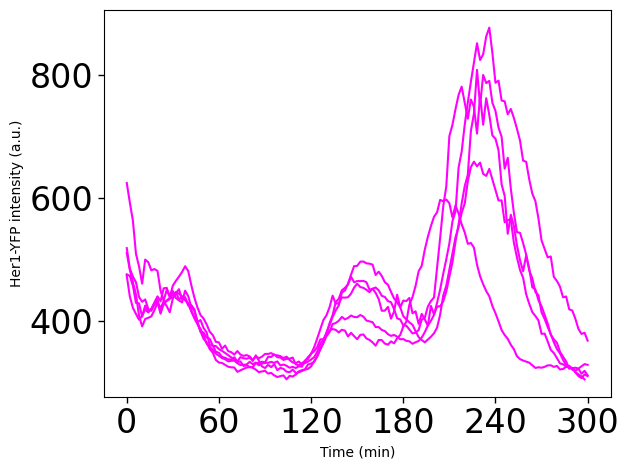

In [59]:
# Convert columns to numeric types
df[track_column] = pd.to_numeric(df[track_column], errors='coerce')
df[time_column] = pd.to_numeric(df[time_column], errors='coerce')
df[time_column_corrected] = df[time_column]*time_interval
df[intensity_column] = pd.to_numeric(df[intensity_column], errors='coerce')


# Drop rows with NaN values in these columns
df.dropna(subset=[track_column, time_column, intensity_column], inplace=True)

df[track_column] = df[track_column].astype(int) # Convert TRACK_ID to integers for plot legend

# Group by TrackID and Time, and calculate the mean intensity
mean_intensity_per_track = df.groupby([track_column, time_column])[intensity_column].mean().reset_index()

# Plotting
fig, ax = plt.subplots()
for track_id in mean_intensity_per_track[track_column].unique():
    track_data = mean_intensity_per_track[mean_intensity_per_track[track_column] == track_id]
    plt.plot(track_data[time_column_corrected], track_data[intensity_column], label=f'Track {track_id}', color='magenta')

plt.tick_params(width=1, length=4, labelsize = 24)
ax.set_xticks(np.arange(0,310,60))

plt.xlabel('Time (min)')
plt.ylabel('Her1-YFP intensity (a.u.)')
#plt.show()

plt.tight_layout()
plt.savefig ('/Users/fnarslan/Documents/in_vivo/3D_mastodon_celltracking/240823-pos5.svg', dpi=300)

In [6]:
# Convert columns to numeric types
df[track_column] = pd.to_numeric(df[track_column], errors='coerce')
df[time_column] = pd.to_numeric(df[time_column], errors='coerce')
df[time_column_corrected] = df[time_column] * time_interval
df[intensity_column] = pd.to_numeric(df[intensity_column], errors='coerce')
df[position_y_column] = pd.to_numeric(df[position_y_column], errors='coerce')

# Drop rows with NaN values in these columns
df.dropna(subset=[track_column, time_column, intensity_column, position_y_column], inplace=True)

# Convert TRACK_ID to integers for plot legend
df[track_column] = df[track_column].astype(int)

# Add a new column 'Spot position.1' based on 'position_y_column'
df['Spot position.1'] = df[position_y_column]

# Group by TrackID and Time, and calculate the mean intensity
mean_intensity_per_track = df.groupby([track_column, time_column_corrected]).agg({
    intensity_column: 'mean',
    'Spot position.1': 'mean'
}).reset_index()

# Plot the last position_y_column value for each track ID
final_positions = df.groupby(track_column)['Spot position.1'].last().reset_index()

plt.figure(figsize=(6, 6))
plt.scatter(final_positions[track_column], final_positions['Spot position.1'], c='red')

# Add track ID labels on the dots
for i in range(len(final_positions)):
    track_id = final_positions.iloc[i][track_column]
    y_position = final_positions.iloc[i]['Spot position.1']
    plt.text(track_id, y_position, str(track_id), fontsize=9, ha='right', va='bottom')

plt.xlabel('Track ID')
plt.ylabel('Final Y Position (Spot position.1)')
plt.title('Final Y Position for Each Track ID')
plt.show()


NameError: name 'position_y_column' is not defined

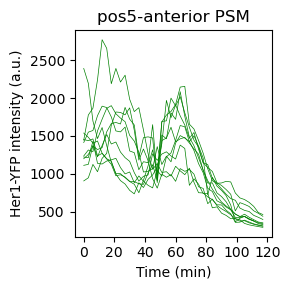

In [85]:
selected_track_ids = [0,1,2,3,14,15,16,17,18,19]  # Replace with your desired track IDs

time_column_corrected = 'time_column_corrected'  # Name for the corrected time column

# Convert columns to numeric types
df[track_column] = pd.to_numeric(df[track_column], errors='coerce')
df[time_column] = pd.to_numeric(df[time_column], errors='coerce')
df[intensity_column] = pd.to_numeric(df[intensity_column], errors='coerce')

# Create the corrected time column only if it doesn't already exist
if time_column_corrected not in df.columns:
    df[time_column_corrected] = df[time_column] * time_interval

# Drop rows with NaN values in these columns
df.dropna(subset=[track_column, time_column_corrected, intensity_column], inplace=True)

df[track_column] = df[track_column].astype(int)  # Convert TRACK_ID to integers for plot legend

# Group by TrackID and Time, and calculate the mean intensity
mean_intensity_per_track = df.groupby([track_column, time_column_corrected])[intensity_column].mean().reset_index()

# Plotting
plt.figure(figsize=(3, 3))

# Filter the tracks based on the selected track IDs
filtered_tracks = mean_intensity_per_track[mean_intensity_per_track[track_column].isin(selected_track_ids)]

for track_id in selected_track_ids:
    track_data = filtered_tracks[filtered_tracks[track_column] == track_id]
    plt.plot(track_data[time_column_corrected], track_data[intensity_column], color='green', linewidth=0.5)  # Thinner lines

# Set x-ticks with a range from 0 to 120, with increments of 10
plt.xticks(range(0, 121, 20))

plt.xlabel('Time (min)')
plt.ylabel('Her1-YFP intensity (a.u.)')
plt.title('pos5-anterior PSM')
plt.tight_layout()
plt.savefig ('/Users/fnarslan/Documents/in_vivo/cell_tracking/pos5.png', dpi=300)



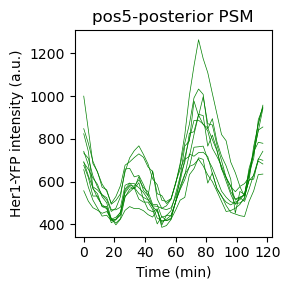

In [86]:
import matplotlib.pyplot as plt

# Example list of track IDs you want to plot

selected_track_ids = [4,5,6,7,8,9,10,11,12,13]  # Replace with your desired track IDs

time_column_corrected = 'time_column_corrected'  # Name for the corrected time column

# Convert columns to numeric types
df[track_column] = pd.to_numeric(df[track_column], errors='coerce')
df[time_column] = pd.to_numeric(df[time_column], errors='coerce')
df[intensity_column] = pd.to_numeric(df[intensity_column], errors='coerce')

# Create the corrected time column only if it doesn't already exist
if time_column_corrected not in df.columns:
    df[time_column_corrected] = df[time_column] * time_interval

# Drop rows with NaN values in these columns
df.dropna(subset=[track_column, time_column_corrected, intensity_column], inplace=True)

df[track_column] = df[track_column].astype(int)  # Convert TRACK_ID to integers for plot legend

# Group by TrackID and Time, and calculate the mean intensity
mean_intensity_per_track = df.groupby([track_column, time_column_corrected])[intensity_column].mean().reset_index()

# Plotting
plt.figure(figsize=(3, 3))

# Filter the tracks based on the selected track IDs
filtered_tracks = mean_intensity_per_track[mean_intensity_per_track[track_column].isin(selected_track_ids)]

for track_id in selected_track_ids:
    track_data = filtered_tracks[filtered_tracks[track_column] == track_id]
    plt.plot(track_data[time_column_corrected], track_data[intensity_column], color='green', linewidth=0.5)  # Thinner lines

# Set x-ticks with a range from 0 to 120, with increments of 10
plt.xticks(range(0, 121, 20))

plt.xlabel('Time (min)')
plt.ylabel('Her1-YFP intensity (a.u.)')
plt.title('pos5-posterior PSM')

plt.tight_layout()
plt.savefig ('/Users/fnarslan/Documents/in_vivo/cell_tracking/pos5-1.png', dpi=300)



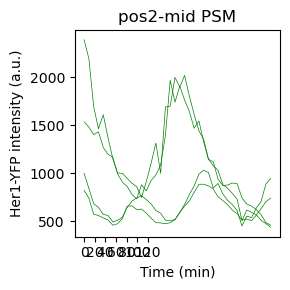

In [79]:
import matplotlib.pyplot as plt

# Example list of track IDs you want to plot

selected_track_ids = [2,3,4,5,20,21,22,23]  # Replace with your desired track IDs

time_column_corrected = 'time_column_corrected'  # Name for the corrected time column

# Convert columns to numeric types
df[track_column] = pd.to_numeric(df[track_column], errors='coerce')
df[time_column] = pd.to_numeric(df[time_column], errors='coerce')
df[intensity_column] = pd.to_numeric(df[intensity_column], errors='coerce')

# Create the corrected time column only if it doesn't already exist
if time_column_corrected not in df.columns:
    df[time_column_corrected] = df[time_column] * time_interval

# Drop rows with NaN values in these columns
df.dropna(subset=[track_column, time_column_corrected, intensity_column], inplace=True)

df[track_column] = df[track_column].astype(int)  # Convert TRACK_ID to integers for plot legend

# Group by TrackID and Time, and calculate the mean intensity
mean_intensity_per_track = df.groupby([track_column, time_column_corrected])[intensity_column].mean().reset_index()

# Plotting
plt.figure(figsize=(3, 3))

# Filter the tracks based on the selected track IDs
filtered_tracks = mean_intensity_per_track[mean_intensity_per_track[track_column].isin(selected_track_ids)]

for track_id in selected_track_ids:
    track_data = filtered_tracks[filtered_tracks[track_column] == track_id]
    plt.plot(track_data[time_column_corrected], track_data[intensity_column], color='green', linewidth=0.5)  # Thinner lines

# Set x-ticks with a range from 0 to 120, with increments of 10
plt.xticks(range(0, 121, 20))

plt.xlabel('Time (min)')
plt.ylabel('Her1-YFP intensity (a.u.)')
plt.title('pos2-mid PSM')
plt.tight_layout()
plt.savefig ('/Users/fnarslan/Documents/in_vivo/cell_tracking/pos2-2.png', dpi=300)




#### Save Intensity Traces

              track_id_0    track_id_1    track_id_2    track_id_3  \
Spot frame                                                           
0.0          6381.997505   7939.715070   6688.117904   8280.937231   
10000.0      6729.981527   7823.206591   6879.430147   8586.304054   
20000.0      2601.613763   6076.567419   8637.858485   8257.186177   
30000.0      6770.224796   8198.410660   7643.164815  10569.119152   
40000.0      6518.726362   7591.271651   7357.055927   8590.892966   
50000.0      6573.906559   7988.683333   7485.694744   9199.184242   
60000.0      7339.972990   8441.097517   7364.114355   8765.848000   
70000.0      6183.012682   8461.045056   7145.928257   8745.296730   
80000.0      6010.752316   8230.859085   7657.594071   8654.485178   
90000.0      6640.387508   8127.636916   6816.939891   8846.902907   
100000.0     7959.076633   7872.809170   7549.595649   9262.744329   
110000.0     6295.769745   8690.549210   7165.910909   8699.347666   
120000.0     7910.50

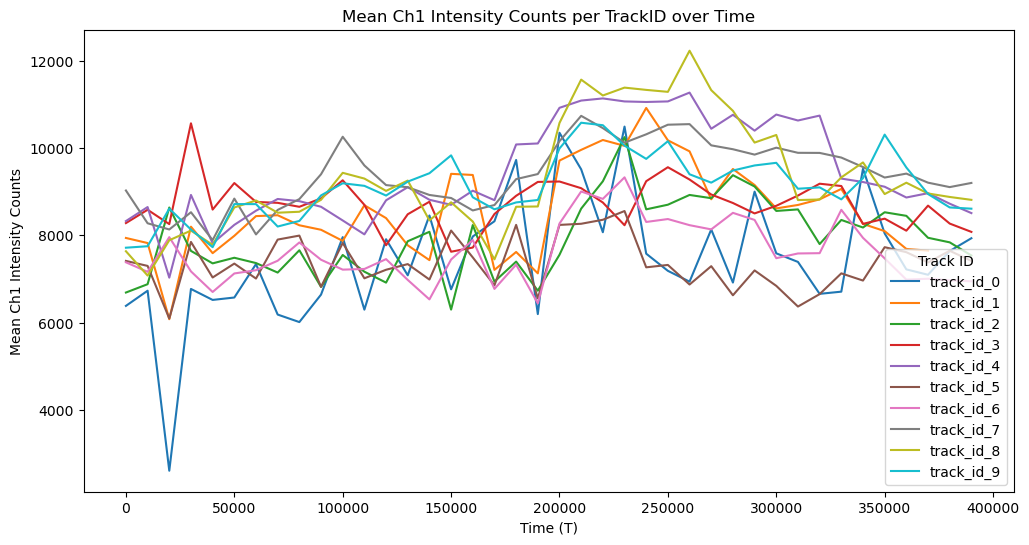

In [32]:
# Assuming df, time_column, track_column, and intensity_column are already defined
# Pivot the table and align all traces to time point 0
pivot_df = df.pivot_table(index=time_column, columns=track_column, values=intensity_column, aggfunc='mean')

# Sort the index (time) to ensure ascending order
pivot_df.sort_index(inplace=True)

# Function to shift values up while maintaining intermediate NaNs
def shift_up(series):
    non_nan_values = series.dropna().values
    return pd.Series(non_nan_values, index=series.index[:len(non_nan_values)]).reindex_like(series)

# Apply the function to each column
pivot_df = pivot_df.apply(shift_up)

# Rename columns to the desired format
pivot_df.columns = [f'track_id_{col}' for col in pivot_df.columns]

# Display the aligned pivot table
print(pivot_df)

# Plotting if needed
pivot_df.plot(figsize=(12, 6))
plt.xlabel('Time (T)')
plt.ylabel('Mean Ch1 Intensity Counts')
plt.title('Mean Ch1 Intensity Counts per TrackID over Time')
plt.legend(title='Track ID')
plt.show()

# Save the pivot table to a CSV file
file_name = os.path.basename(csv_file_path)
new_directory = '/Users/fnarslan/Documents/in_vivo/gastruloids/pyBOAT'
file_path = os.path.join(new_directory, file_name)


# Save the DataFrame to the CSV file
pivot_df.to_csv(file_path, index=False)

